In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns

In [2]:
def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None

In [3]:
dfcols = ['filename', 'name', 'xmin', 'ymin', 'xmax', 'ymax']
parsedXML = ET.parse("data.xml")
root = parsedXML.getroot()

In [4]:
count_files = 0
count_objects = 0
df_xml = pd.DataFrame(columns=dfcols)
for node in root:
    filename = node.find('filename')
    count_files+=1
    for obj in node.findall('object'):
        count_objects+=1
        name = obj.find('name')
        xmin = obj.find('bndbox/xmin')
        ymin = obj.find('bndbox/ymin')
        xmax = obj.find('bndbox/xmax')
        ymax = obj.find('bndbox/ymax')
        df_xml = df_xml.append(pd.Series([getvalueofnode(filename), getvalueofnode(name), getvalueofnode(xmin), getvalueofnode(ymin), getvalueofnode(xmax), getvalueofnode(ymax)], index=dfcols), ignore_index=True)            


In [5]:
print("Total files:", count_files, "\nTotal objects:", count_objects)

Total files: 3183 
Total objects: 7824


In [6]:
df_xml.head()

,filename,name,xmin,ymin,xmax,ymax
0,apple_L1_001_100_133.jpg,apple,1,144,158,343
1,apple_L1_001_100_133.jpg,apple,295,148,530,376
2,apple_L1_001_105_88.jpg,apple,165,114,326,277
3,apple_L1_001_105_88.jpg,apple,433,126,640,347
4,apple_L1_001_10_112.jpg,apple,232,153,386,312


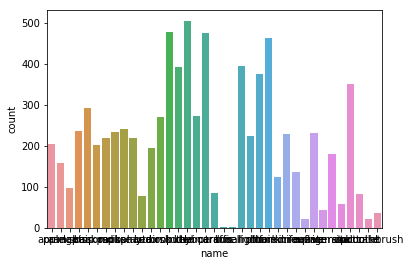

In [7]:
sns.countplot(df_xml.name)

In [8]:
light_type = []
for filename in df_xml['filename']:
    if 'L1' in filename:
        light_type.append('L1')
    elif 'L2' in filename:
        light_type.append('L2')
    elif 'L3' in filename:
        light_type.append('L3')
    else:
        light_type.append('not_detected')
        

In [9]:
for i in range(10):
    print(light_type[i])

L1
L1
L1
L1
L1
L1
L1
L1
L1
L1


In [10]:
dictionary_obj = {}
for obj_name in df_xml['name']:
    if obj_name not in dictionary_obj:
        dictionary_obj[obj_name] = 1
    else:
        dictionary_obj[obj_name] += 1

In [11]:
for i in dictionary_obj.keys():
    print(i,"\t", dictionary_obj[i])

apple 	 205
orange 	 159
armchair 	 98
laptop 	 235
scissors 	 291
backpack 	 202
cup 	 219
mouse 	 233
display 	 241
banana 	 218
bed 	 78
stairs 	 194
book 	 270
computer 	 478
bottle 	 392
chair 	 505
keyboard 	 273
car 	 475
person 	 86
bus 	 3
traffic light 	 2
carrot 	 394
cell phone 	 223
door 	 374
fork 	 463
hair drier 	 123
knife 	 229
microwave 	 135
oven 	 22
plate 	 232
refrigerator 	 44
remote 	 179
sink 	 57
spoon 	 351
suitcase 	 82
toilet 	 22
toothbrush 	 37


In [12]:
df_xml['light_type']=light_type

In [14]:
df_xml

,filename,name,xmin,ymin,xmax,ymax,light_type
0,apple_L1_001_100_133.jpg,apple,1,144,158,343,L1
1,apple_L1_001_100_133.jpg,apple,295,148,530,376,L1
2,apple_L1_001_105_88.jpg,apple,165,114,326,277,L1
3,apple_L1_001_105_88.jpg,apple,433,126,640,347,L1
4,apple_L1_001_10_112.jpg,apple,232,153,386,312,L1
5,apple_L1_001_10_112.jpg,apple,410,117,528,235,L1
6,apple_L1_001_10_112.jpg,apple,174,112,275,218,L1
7,apple_L1_001_110_115.jpg,apple,246,98,436,298,L1
8,apple_L1_001_110_115.jpg,apple,424,86,554,211,L1
9,apple_L1_001_110_115.jpg,apple,142,107,260,229,L1


In [15]:
df_xml.to_excel('summary.xls')

In [50]:
dictionary_obj = {}

cur_frame = df_xml[['name','light_type']]
for index, rows in cur_frame.iterrows():
    obj_name = "{0}_{1}".format(rows['name'], rows['light_type'])
    if obj_name not in dictionary_obj:
        dictionary_obj[obj_name] = 1
    else:
        dictionary_obj[obj_name] += 1    

In [51]:
dictionary_obj

{'apple_L1': 111,
 'apple_L2': 67,
 'orange_L2': 58,
 'apple_L3': 27,
 'armchair_L2': 48,
 'laptop_L2': 81,
 'scissors_L2': 68,
 'backpack_L2': 79,
 'cup_L2': 53,
 'mouse_L2': 79,
 'scissors_L3': 94,
 'armchair_L3': 50,
 'backpack_L3': 48,
 'mouse_L3': 37,
 'laptop_L3': 74,
 'cup_L3': 51,
 'display_L3': 75,
 'backpack_L1': 75,
 'banana_L1': 69,
 'banana_L2': 101,
 'banana_L3': 48,
 'bed_L1': 34,
 'stairs_L1': 183,
 'bed_L2': 17,
 'bed_L3': 27,
 'stairs_L3': 11,
 'book_L1': 116,
 'cup_L1': 115,
 'computer_L1': 414,
 'book_L2': 51,
 'book_L3': 103,
 'bottle_L1': 161,
 'chair_L1': 156,
 'keyboard_L1': 78,
 'display_L1': 79,
 'bottle_L2': 100,
 'chair_L2': 201,
 'bottle_L3': 131,
 'car_L1': 475,
 'person_L1': 86,
 'bus_L1': 3,
 'traffic light_L1': 2,
 'carrot_L1': 196,
 'carrot_L2': 68,
 'carrot_L3': 130,
 'cell phone_L2': 71,
 'cell phone_L3': 60,
 'cell phone_L1': 92,
 'door_L2': 16,
 'chair_L3': 148,
 'mouse_L1': 117,
 'door_L1': 357,
 'computer_L2': 34,
 'keyboard_L2': 132,
 'display_L